In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# Importing the ords_prods_customer_reduced_merged data frame
ords_prods_customer_reduced_merged = pd.read_pickle (r'C:\Users\49157\Downloads\Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_customer_reduced_merged')

In [3]:
ords_prods_customer_reduced_merged.head()

,order_id,user_id,order_hour_of_day,prices,loyalty_flag,age,number_of_dependants,family_status,income,_merge
0,2539329,1,8,9.0,Low spender,31,3,married,40423,both
1,2539329,1,8,12.5,High spender,31,3,married,40423,both
2,2539329,1,8,4.4,Low spender,31,3,married,40423,both
3,2539329,1,8,4.7,Low spender,31,3,married,40423,both
4,2539329,1,8,1.0,Low spender,31,3,married,40423,both


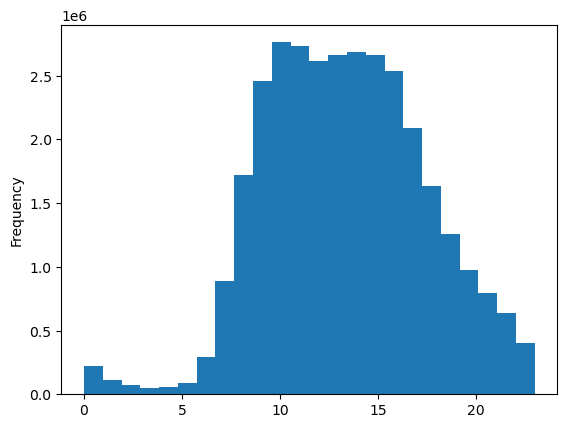

In [4]:
# Creating a histogram of the “order_hour_of_day” column
hist = ords_prods_customer_reduced_merged['order_hour_of_day'].plot.hist(bins = 24)

# # The histogram of "order hour of day" shows a clear trend that the majority of orders are placed between late morning and early afternoon, peaking around midday and early evenings. There are significantly fewer orders placed during early morning and late evening hours. Understanding these patterns can help Instacart optimize operations, allocate resources effectively, and plan targeted marketing strategies. By leveraging these insights, Instacart can improve operational efficiency and enhance the overall customer experience. Instacart can also allocate more resources (e.g., workers, delivery vehicles) during peak order times to effieciently handle the high volume of orders. Fewer resources might be needed during the early morning and late evening hours. Marketing efforts and promotions could be strategically targeted during the peak hours to maximize visibility and customer engagement. Knowing the busiest hours can help Instacart prepare for higher volumes of customer inquiries and support requests during those times. Ensuring adequate staffing and support during peak hours can improve customer satisfaction and service quality.

In [5]:
# Step 4
ords_prods_customer_reduced_merged['loyalty_flag'].value_counts().sort_index()

loyalty_flag
High spender    10643922
Low spender     21760937
Name: count, dtype: int64

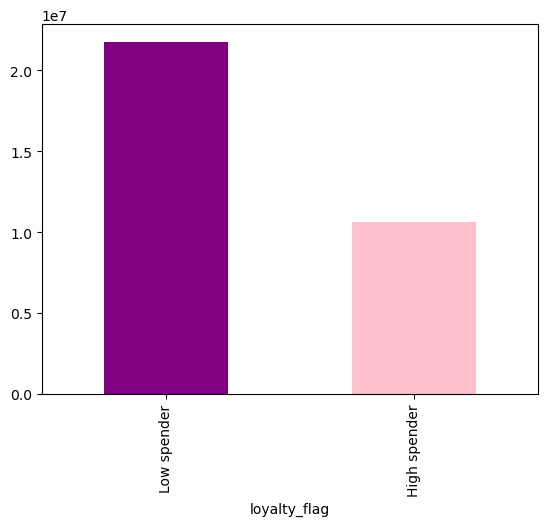

In [6]:
# Creating a bar chart from the “loyalty_flag” column.
bar = ords_prods_customer_reduced_merged ['loyalty_flag'].value_counts().plot.bar(color = ['purple', 'pink'])

 # The bar for "Low spender" is tall, indicating that the majority of Instacart customers fall into this category. There are over 20 million low spenders. The bar for "High spender" is shorter, showing that fewer customers fall into this category compared to low spenders. There are over 10 million high spenders. Instacart can use this information to tailor marketing and promotional strategies for different customer segments. High spenders might be targeted with premium offers and loyalty programs to maintain their high spending. Understanding the distribution of spenders can help Instacart allocate resources and design services that cater to the larger group of low spenders, while also creating exclusive services for high spenders. Instacart can analyze the spending patterns further to understand what drives customers to spend more and create strategies to convert low spenders into high spenders.

In [7]:
# Checking whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day using a line chart.
# Creating a line chart to see the development of the “prices” column across the hour of the day
# We are plotting the “order_hour_of_day” column on the x-axis and the “prices” column on the y-axis 
# Create a random sample by generating a seed
np.random.seed(4)

In [8]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(ords_prods_customer_reduced_merged )) <= 0.7
dev  

array([False,  True, False, ...,  True,  True,  True])

In [9]:
# np.random.rand() function  to produces a list of 10 random numbers 
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [10]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_customer_reduced_merged )) <= 0.7

In [11]:
# Store 70% of the sample in the dataframe big
big = ords_prods_customer_reduced_merged [dev]

In [12]:
# Store 30% of the sample in the dataframe small
small = ords_prods_customer_reduced_merged [~dev]

In [ ]:
# If big is 70 percent and small is 30 percent of ords_prods_merge, we would get the same numbers of rows as your original ords_prods_merge dataframe 
# if you added the rows of both samples together  

In [13]:
len(ords_prods_customer_reduced_merged)

32404859

In [14]:
len (big) + len (small)

32404859

In [15]:
# Reducing samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day.”
ords_prods_customer_reduced_merged = small[['order_hour_of_day','prices']]

C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


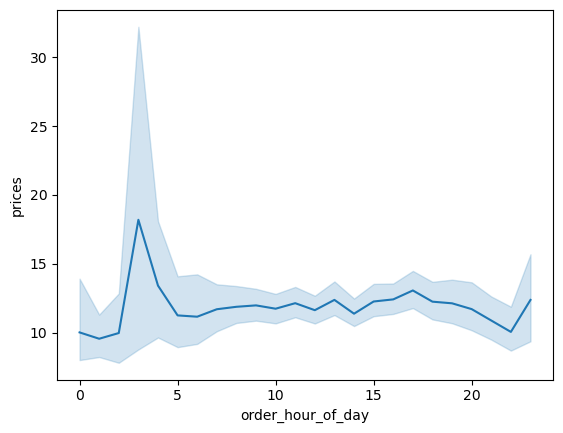

In [16]:
# Finally creating a line chart to see the development of the “prices” column across the hour of the day
line = sns.lineplot(data =ords_prods_customer_reduced_merged, x = 'order_hour_of_day',y = 'prices')

# This line plot visualizes the relationship between the order hour of the day (order_hour_of_day) and the prices of the products ordered. The line plot is accompanied by a shaded area, which typically represents the confidence interval or variability around the mean price. There is a noticeable spike in prices around the early morning hours (approximately 3-5 AM). This indicates that the products ordered during these hours tend to have higher average prices.The spike could be due to specific high-priced items being ordered more frequently during this time. Throughout the rest of the day, from late morning to evening, the average prices of products ordered remain relatively stable, fluctuating slightly around a lower mean price. There is a slight increase in average prices again towards the late night hours. This could indicate a trend where higher-priced items are ordered more frequently during this time as well. The data can be used to further analyze customer behavior and preferences based on the time of the day, helping to tailor marketing efforts and improve customer satisfaction.

In [17]:
# creating a line chart exploring the connections between age and number of dependants:
# Reducing samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day.”
ords_prods_customer_reduced_merged = small[['age','number_of_dependants']]

C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


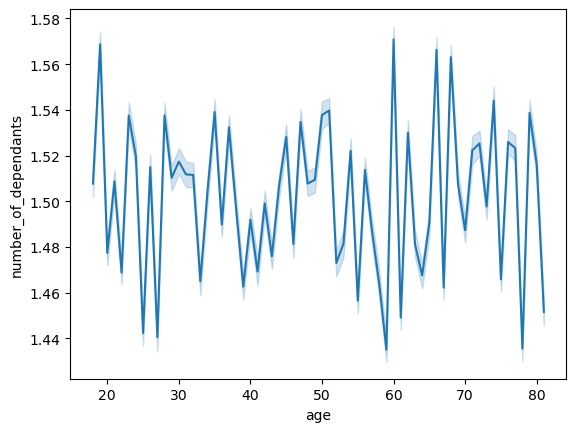

In [18]:
# creating a line chart exploring the connections between age and number of dependants:
line = sns.lineplot(data =ords_prods_customer_reduced_merged, x = 'age',y = 'number_of_dependants')

# From the line chart, there is obviously no clear comnection between age and the number of dependants. If the line slopes upwards as age increases, this might actually suggest there may be a positive correlation between age and the number of dependants, and if the line slopes downwards, it suggests a negative correlation where older individuals tend to have fewer dependants.

In [19]:
# Reducing samples to only those columns necessary for the chart, namely “age” and “income.”
ords_prods_customer_reduced_merged = small[['age','income']]

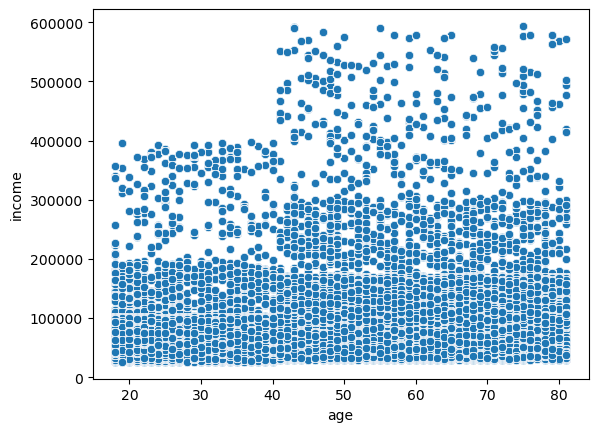

In [29]:
# Checking if there is a connection between age and spending power (income). 
# To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customer_reduced_merged)

# We can see a wide range of income among all the age groups, particularly age groups between 40 and 80. We can also see that there is an upward trend in the spending power, having so many data points concentrated within 40 to 80. This could imply that, from around age 40 onwards, there is a noticeable increase in income levels and that income tends to increase as people get older. The scatterplot visually represents these trends, indicating potential increases in income with age.

In [21]:
# Creating path
path = r'C:\Users\49157\Downloads\Instacart Basket Analysis'
path

'C:\\Users\\49157\\Downloads\\Instacart Basket Analysis'

In [ ]:
# Exporting all visualizations.

In [22]:
# Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [23]:
# Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [24]:
# Exporting the line charts
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_of_day.png'))

In [25]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependants.png'))

In [ ]:
# Exporting the scatterplot

In [30]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

In [ ]:
# Exporting the ords_prods_customer_reduced_merged as a pickle file

In [32]:
ords_prods_customer_reduced_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customer_reduced_merged.pkl'))